<a href="https://colab.research.google.com/github/Ruhit43/NLP-Clustering/blob/main/NLP_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning - Clustering on IMDB Dataset of 50K Movie Reviews

**Loading IMDB movie review dataset**

In [ ]:
from pandas import read_csv, set_option, DataFrame

# Data Loading from csv file
data = read_csv("IMDB Dataset.csv")
set_option('display.max_colwidth', None) # To see the full content
data.head()

,review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done."
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends."
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when

# Business Understanding

Grouping the IMDB movie reviews into clusters identifies possible patterns or sentiments shared among the reviews.

#Data Understanding
IMDB movie review dataset contains 50,000 rows of reviews. Each row contains only one column: "review". The "review" column contains review of each users.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


# Data Preparation

**Deleting duplicate values**

In [ ]:
data[data['review'].duplicated(keep=False)].sort_values('review').head(10)

,review
34058,"""Go Fish"" garnered Rose Troche rightly or wrongly the reputation of a film maker with much promise.<br /><br />Its then hard to understand how she could turn out a movie made up of stereotypes that one associates with inferior sitcoms. The entire film rings hollow. I cringed the whole way through.<br /><br />Its supposed to be a look into nineties human sexuality. Well not much more here to be learned than from ""In and Out"". By now most of us actually do know, that there are men who are sexually attracted to women and there men who are sexually attracted to men and there are even men sexually attracted to both sexes. <br /><br />Seldom has this revelation been portrayed on the screen with so little wit and style.<br /><br />Pathetic."
47467,"""Go Fish"" garnered Rose Troche rightly or wrongly the reputation of a film maker with much promise.<br /><br />Its then hard to understand how she could turn out a movie made up of stereotypes that one associates with inferior sitcoms. The entire film rings hollow. I cringed the whole way through.<br /><br />Its supposed to be a look into nineties human sexuality. Well not much more here to be learned than from ""In and Out"". By now most of us actually do know, that there are men who are sexually attracted to women and there men who are sexually attracted to men and there are even men sexually attracted to both sexes. <br /><br />Seldom has this revelation been portrayed on the screen with so little wit and style.<br /><br />Pathetic."
29956,"""Three"" is a seriously dumb shipwreck movie. Masquerading as a psychological thriller, it's closest relative is the monumentally superior ""Dead Calm"" (also featuring Billy Zane). ""Dead Calm"" provided well drawn characters to root for in the form of Sam Neil and Nicole Kidman's grieving parents attempting to re-define their relationship on an ocean cruise. They end up being terrorised by Zane's adrift psycho-killer. It provided sharp, increasingly ratcheted suspense, a scary feeling of claustrophobia in open seas as the cat and mouse game of life and death unfolded.<br /><br />""Three"" suffers from poorly drawn characterisation (the audience doesn't care what happens to any of them), a stupid and unnecessary voodoo plot device, a total lack of suspense or excitement and some thudding, hammy performances from the principal players. Zane in particular goes way over the top in an irritatingly mannered fashion. In ""Dead Calm"" he was menacing, wired and seething with barely controlled sexual violence. Here he is bombastic, petulant slimy, and unravelled. And where does he get his seemingly inexhaustible supply of dry cigarettes and cigars? And how come his lighter stays full of juice for over a year? Ms Brook is very picturesque, stunningly pretty, but both her chest and rear appear to have been wildly over-inflated by some sort of life-raft pump. They do, however, succeed in acting with more skill and conviction than the rest of her. Dramatic actress, in the purest sense of the term, she is not. The guy playing the voodoo-hexed Manuel, the third component of this sorry triangle, could have been replaced by a lump of driftwood - no one would notice. In fact, judging by his complete lack of ability to deliver dialogue in any meaningful or dynamic way, driftwood represents a potential improvement in the casting stakes (excuse pun).<br /><br />Plus sides: the scenery is nice and the cinematography (above and below the water) is credible.<br /><br />I'm guessing this had a very limited (if any) theatrical release or went straight to rental and retail DVD. The reason for this is it's not very good. If you want something decent along these lines, get ""Dead Calm."" It was made by people who knew a bit about cinema."
31488,"""Three"" is a seriously dumb shipwreck movie. Masquerading as a psychological thriller, it's closest relative is the monumentally superior ""Dead Calm"" (also featuring Billy Zane). ""Dead Calm"" provided well dr

In [ ]:
data = data.drop_duplicates('review')

**Function definition**: sanitizer function that sanitizes and cleans data & applies WordNetLemmatizer on review column

In [ ]:
import re, nltk, html
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

def sanitizer(blog):
    text = re.sub(r'http\S+|www.\S+', '', str(blog)) # Removes URLs
    text = BeautifulSoup(text, 'html.parser').get_text(separator=' ') # Removes HTML Elements & Tags
    text = html.unescape(text) #Removes HTML Entities
    text = re.sub(r'[^A-Za-z0-9\s]', '', text) # Removes Punctuation & Special Characters
    tokens = nltk.word_tokenize(text)
    tokens_lower_case = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    filtered_words = list(filter(lambda l: l not in stop_words, tokens_lower_case))
    lemmas = [WordNetLemmatizer().lemmatize(filtered_word) for filtered_word in filtered_words] # Implementation of Lemmatizer
    return lemmas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Applying sanitizer on review column**

In [ ]:
data_cleaned = DataFrame(data.review.apply(sanitizer))
data_cleaned = data_cleaned[data_cleaned['review'].map(len) > 0] # Removing zero length review
print("Printing top 5 rows of dataframe showing original review")
print(data.head())
print("Printing top 5 rows of dataframe showing cleaned review")
print(data_cleaned.head())
data_cleaned['review'] = [" ".join(row) for row in data_cleaned['review'].values] # Joining tokens to create a single string

Printing top 5 rows of dataframe showing original review
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

**WorldCloud visualization**

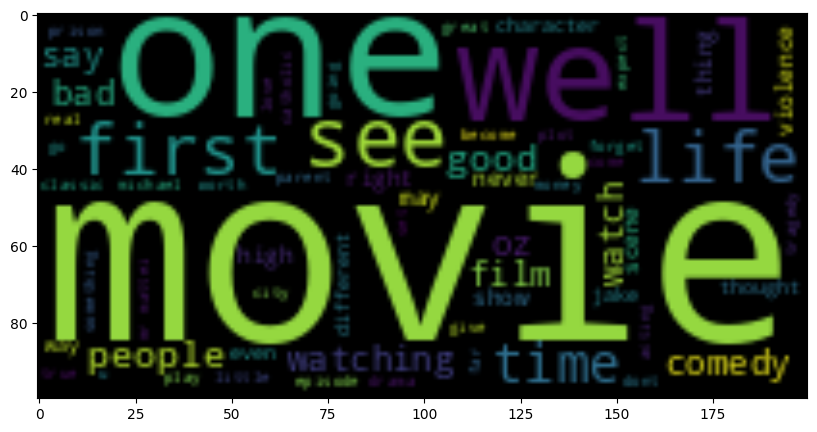

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 200, height = 100, random_state= 25, max_font_size= 125).generate(str(data_cleaned['review']))
plt.figure(figsize=(20,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

**Applying TfidVectorizer on review column**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF = TfidfVectorizer() # Implementation of TFIDF vectorizer to learn vocabulary of entire review column
TFIDF.fit(data_cleaned['review']) # To learn vocabulary
X = TFIDF.transform(data_cleaned['review']) # Creating TFIDF values into the review column
print("Shape of X: ", X.shape)

Shape of X:  (49582, 155153)


Printing the first 5 vector values

In [ ]:
print(X[:5])

  (0, 154139)	0.047921885172162546
  (0, 152718)	0.04970428225169617
  (0, 152702)	0.02518833226443001
  (0, 152300)	0.08840400500906936
  (0, 150800)	0.19446156096075143
  (0, 149621)	0.026715693304070455
  (0, 148906)	0.06790325125987157
  (0, 148886)	0.04144704583187825
  (0, 147329)	0.2071406072071408
  (0, 147097)	0.13048052363542026
  (0, 145537)	0.044224607392031115
  (0, 144051)	0.09794225288272657
  (0, 143412)	0.0737233678183767
  (0, 142022)	0.051599884923247845
  (0, 141651)	0.06396075088905495
  (0, 140086)	0.05532038398769564
  (0, 138869)	0.09318383582556712
  (0, 137496)	0.02847200328721273
  (0, 135440)	0.058298891874939966
  (0, 133705)	0.06862831045655139
  (0, 131854)	0.14680364332859547
  (0, 131588)	0.05362418202333197
  (0, 130215)	0.05292309147854607
  (0, 130024)	0.07760708730424629
  (0, 127447)	0.07236181755023811
  :	:
  (4, 38626)	0.16980270025449226
  (4, 38295)	0.04487794561296974
  (4, 38265)	0.06039779437182874
  (4, 37834)	0.16316928480770237
  (4, 348

In [ ]:
word_features = TFIDF.get_feature_names_out()
print(len(word_features))
print(word_features[5000:5050])

155153
['adair' 'adajanis' 'adalbert' 'adalberto' 'adam' 'adama' 'adamafather'
 'adamant' 'adamantium' 'adamantly' 'adamas' 'adamason' 'adamdanny'
 'adames' 'adamfontaine' 'adamic' 'adammichael' 'adamos' 'adampriest'
 'adams' 'adamsdirk' 'adamson' 'adamsona' 'adamsons' 'adamssam' 'adante'
 'adapt' 'adaptability' 'adaptable' 'adaptaion' 'adaptation'
 'adaptationan' 'adapted' 'adaptedi' 'adapter' 'adapting' 'adaption'
 'adaptor' 'adapts' 'adarsh' 'aday' 'adays' 'add' 'addams' 'added'
 'addedaltered' 'addedin' 'addedomitted' 'addedphotographed' 'addedscene']


#Modeling

**Applying kmeans clustering with 4 clusters on the review column**

In [ ]:
k = 4

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(X)

Adding the cluster labels to the original DataFrame

In [ ]:
data['cluster'] = clusters
data_cleaned['cluster'] = clusters

Printing the first 20 rows to check the cluster assignments

In [ ]:
data.head(20)

,review,cluster
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",0
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",3
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",3
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, fir

#Evaluation
For model evaluation, Silhouette Score is applied for different values of K which measures how similar an object is to its own cluster (higher is better).

**Function defination**: evaluation() to perform model evaluation for different values of k

In [ ]:
from sklearn.metrics import silhouette_score
def evaluation(range_value):
  index_labels = ['k=' + str(i+3) for i in range(range_value)]
  column_labels = ['Silhouette Score']

  silhouette_score_DF = DataFrame(columns = column_labels, index = index_labels)
  for i in range(range_value):
    k = i + 3
    model = KMeans(n_clusters=k, random_state=42)
    clusters = model.fit_predict(X)
    labels = model.labels_
    silhouette_score_DF.at[index_labels[i], 'Silhouette Score'] = silhouette_score(X, labels)
  return silhouette_score_DF

**Function calling: evaluation()**

In [ ]:
silhouette_score_DF = evaluation(7)
silhouette_score_DF

,Silhouette Score
k=3,0.000943
k=4,0.001282
k=5,0.000558
k=6,0.00053
k=7,0.000062
k=8,-0.000968
k=9,-0.000903


#Visualization

Histogram of Silhouette Score for different values of k

<Axes: >

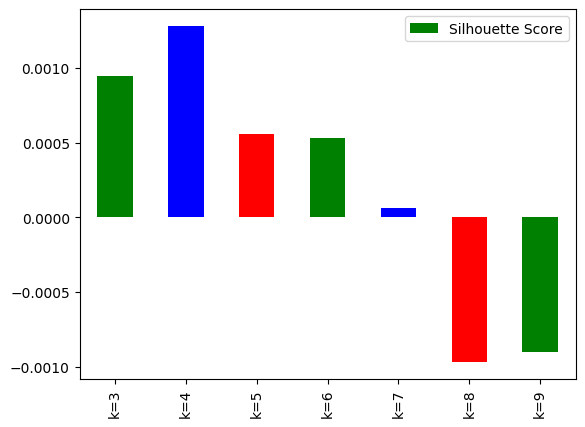

In [ ]:
silhouette_score_DF.plot(y='Silhouette Score', kind='bar', color=['g', 'b', 'r'])

From the above histogram, it can be observed that highest Silhouette Score can be obtained when k=4. Hence k=4 is chosen for model deployment.

**Distribution of Instances in Each Cluster for k=4**

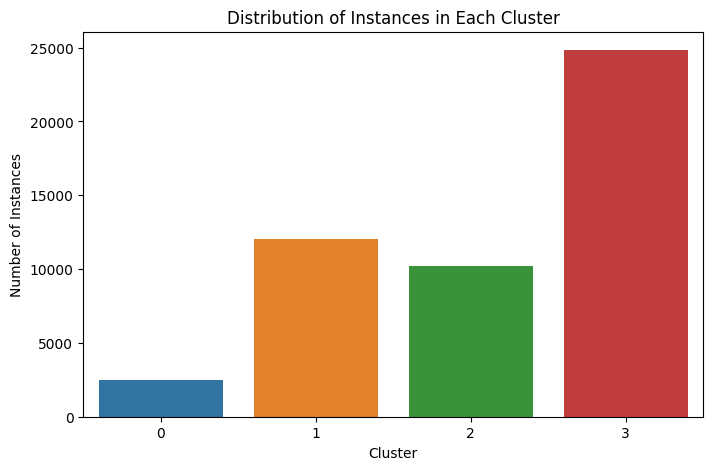

In [ ]:
import seaborn as sns

# Counting the number of instances in each cluster
cluster_counts = data['cluster'].value_counts()

# Plotting the cluster distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.title('Distribution of Instances in Each Cluster')
plt.show()

#Deployment

Once the model is trained and evaluated, it can be deployed using API integration. The model is saved in pickle file format.

In [ ]:
import pickle

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(model, f)